# EDA

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import statistics
import visualisations as vis
import random
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor


sns.set_theme(context='notebook', style='darkgrid', palette='tab10')

In [2]:
df = pd.read_csv('../data/clean_combined_wines.csv')
# set name column as index
df.set_index('name', inplace=True)
df.head()

,region,country,vintage,producer,wine_variety,grape_variety,price,rating,rating_qty,abv,reviewed_by,from_vivino,age,log_price,log_rating_qty
name,,,,,,,,,,,,,,,
Ruffino Il Leo Chianti Superiore 2017,Chianti,Italy,2017,Ruffino,sparkling,Chianti,11.71,3.6,270,NaN,unknown,True,7,2.460443,5.598422
Darenberg The Love Grass Shiraz 2017,Mclaren Vale,Australia,2017,Darenberg,red,Shiraz,19.99,3.7,235,NaN,unknown,True,7,2.995232,5.459586
Pittnauer Pitti 2018,Burgenland,Austria,2018,Pittnauer,red,Unknown,8.54,3.7,190,NaN,unknown,True,6,2.144761,5.247024
Darenberg The Footbolt Shiraz 2017,Mclaren Vale,Australia,2017,Darenberg,sparkling,Shiraz,12.37,3.7,792,NaN,unknown,True,7,2.515274,6.674561
Kendalljackson Vintners Reserve Cabernet Sauvignon 2018,Sonoma County,United States,2018,Kendalljackson,red,Cabernet Sauvignon,23.99,3.9,2805,NaN,unknown,True,6,3.177637,7.939159


In [3]:
print(df.shape)
df.describe()

(38995, 15)


,vintage,price,rating,rating_qty,abv,age,log_price,log_rating_qty
count,38995.000000,38995.000000,38995.000000,38995.000000,768.000000,38995.000000,38995.000000,38995.000000
mean,2015.439159,35.769451,3.861487,423.665367,13.769466,8.560841,3.054395,5.144536
std,3.237153,79.612427,0.306263,938.256662,1.061007,3.237153,0.849750,1.249530
min,1984.000000,2.800000,2.500000,21.000000,5.000000,3.000000,1.029619,3.044522
25%,2014.000000,11.490000,3.700000,63.000000,13.500000,7.000000,2.441477,4.143135
50%,2016.000000,18.510000,3.800000,151.000000,14.000000,8.000000,2.918311,5.017280
75%,2017.000000,31.160000,4.100000,396.000000,14.500000,10.000000,3.439135,5.981414
max,2021.000000,3700.660000,5.000000,24713.000000,15.900000,40.000000,8.216266,10.115085


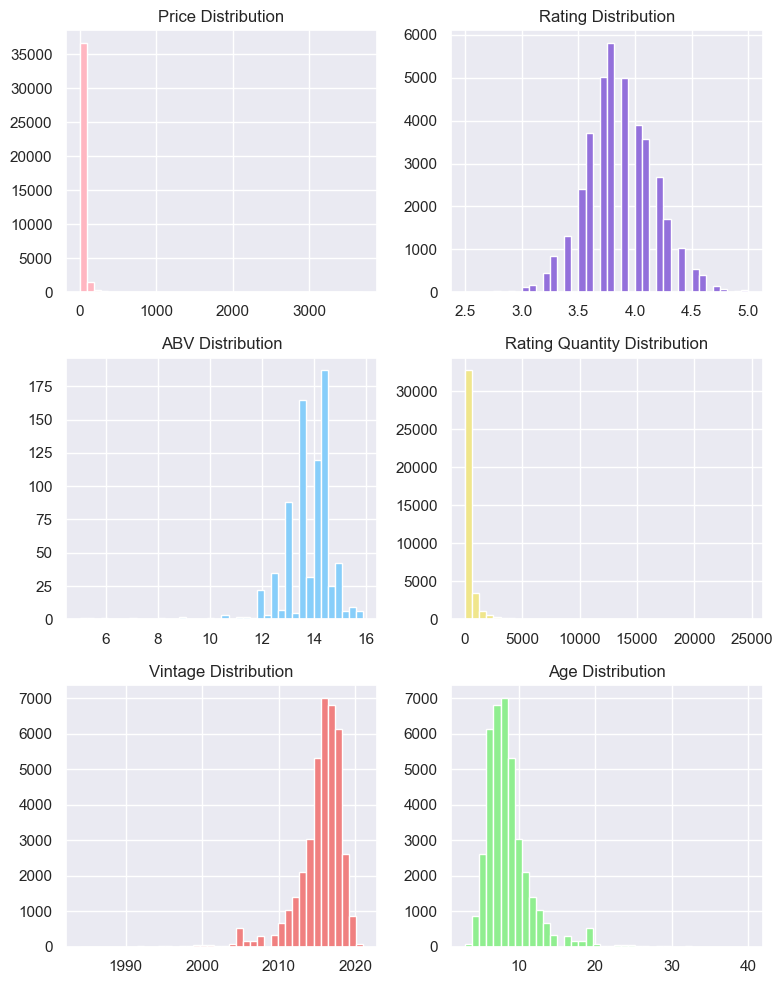

In [4]:

fig, axs = plt.subplots(3, 2, figsize=(8, 10))  
bins = 40
axs[0, 0].hist(df['price'], bins=bins, color='lightpink')
axs[0, 0].set_title('Price Distribution')
axs[0, 0].grid(True)

axs[0, 1].hist(df['rating'], bins=bins, color='mediumpurple')
axs[0, 1].set_title('Rating Distribution')
axs[0, 1].grid(True)

axs[1, 0].hist(df['abv'], bins=bins, color='lightskyblue')
axs[1, 0].set_title('ABV Distribution')
axs[1, 0].grid(True)

axs[1, 1].hist(df['rating_qty'], bins=bins, color='khaki')
axs[1, 1].set_title('Rating Quantity Distribution')
axs[1, 1].grid(True)

axs[2, 0].hist(df['vintage'], bins=bins, color='lightcoral')
axs[2, 0].set_title('Vintage Distribution')
axs[2, 0].grid(True)

axs[2, 1].hist(df['age'], bins=bins, color='lightgreen')
axs[2, 1].set_title('Age Distribution')
axs[2, 1].grid(True)

plt.tight_layout()
# plt.show()


* Prices are heavily right skewed and would likely benefit from a logarithmic transformation before modelling.
* Rating qty also heavily right skewed and would likely benefit from a logarithmic transformation before modelling. Most wine have very few reviews, with some extreme outliers up to 24713. 
* ABV content fairly normally distibuted with clear spike at median of 13.5% 
* High number of observations with zero values in rating and rating_qty which is likely to affect the predictivness of any mode. A wine that has no reviews should not be considered to have a rating of zero. 

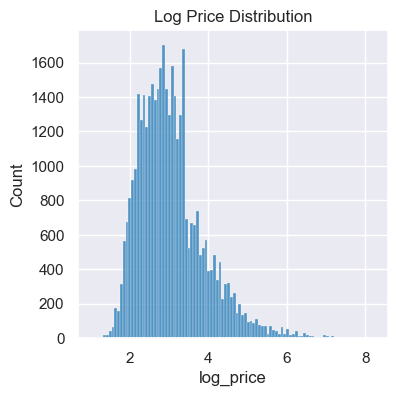

In [5]:
# remove price outliers from dataframe, log transform price and plot

df['log_price'] = np.log(df['price'])
plt.figure(figsize=(4, 4))
plt.title('Log Price Distribution')
sns.histplot(df['log_price'], bins=100)  # kde=False turns off the kernel density estimate plot overlay
plt.show();

* Log price much more normally distributed. 

Max outlier bound log_price: 4.936
Number of remaining rows: 37703, rows removed: 1292


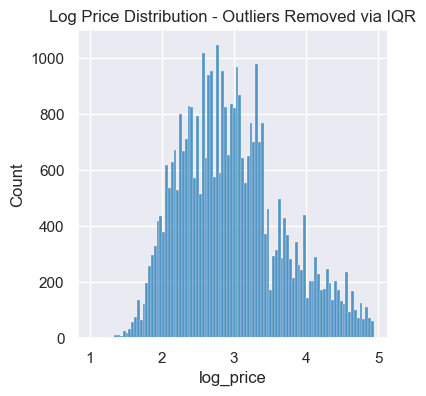

In [6]:
# calculate interquartile range of price, and set a limit at 1.5 IQR above 75% percentile
Qrt1 = np.quantile(df['log_price'], 0.25)
Qrt3 = np.quantile(df['log_price'], 0.75)
price_IQR = Qrt3 - Qrt1
outlier_price_limit = Qrt3 + (price_IQR * 1.5)
df_IQR_price = df[df['log_price'] < outlier_price_limit]
print('Max outlier bound log_price: ', round(outlier_price_limit,3), sep='')
print(f'Number of remaining rows: {df_IQR_price.shape[0]}, rows removed: {df.shape[0] - df_IQR_price.shape[0]}')
plt.figure(figsize=(4, 4))
plt.title('Log Price Distribution - Outliers Removed via IQR')
sns.histplot(df_IQR_price['log_price'], bins=100) 
plt.show();

In [7]:
df['log_price'].describe()

count    38995.000000
mean         3.054395
std          0.849750
min          1.029619
25%          2.441477
50%          2.918311
75%          3.439135
max          8.216266
Name: log_price, dtype: float64

* Ratings fairly normally distributed around a median of 3.9. Small peak at 5 for wines which have been rated the maximum of 5 stars.

In [15]:
count_wines_by_country = df['country'].value_counts()

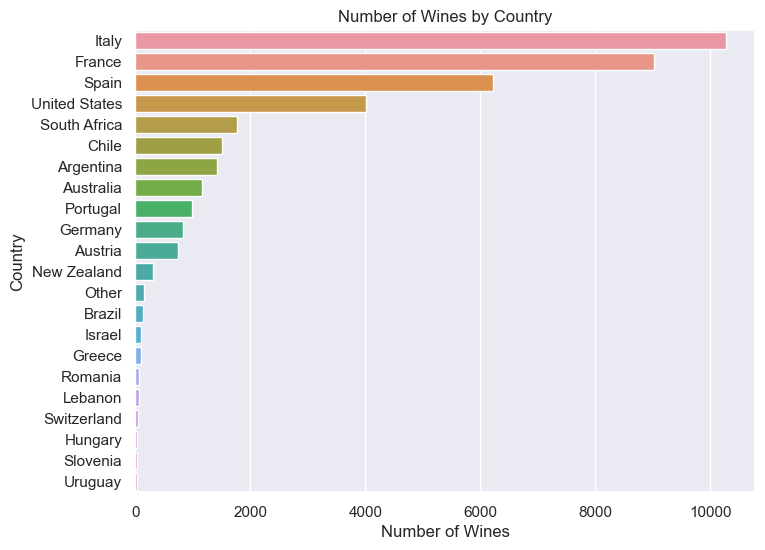

In [8]:
count_wines_by_country = df['country'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=count_wines_by_country.values, y=count_wines_by_country.index)
plt.xlabel('Number of Wines')
plt.ylabel('Country')
plt.title('Number of Wines by Country');

### ABV - Alcohol Content

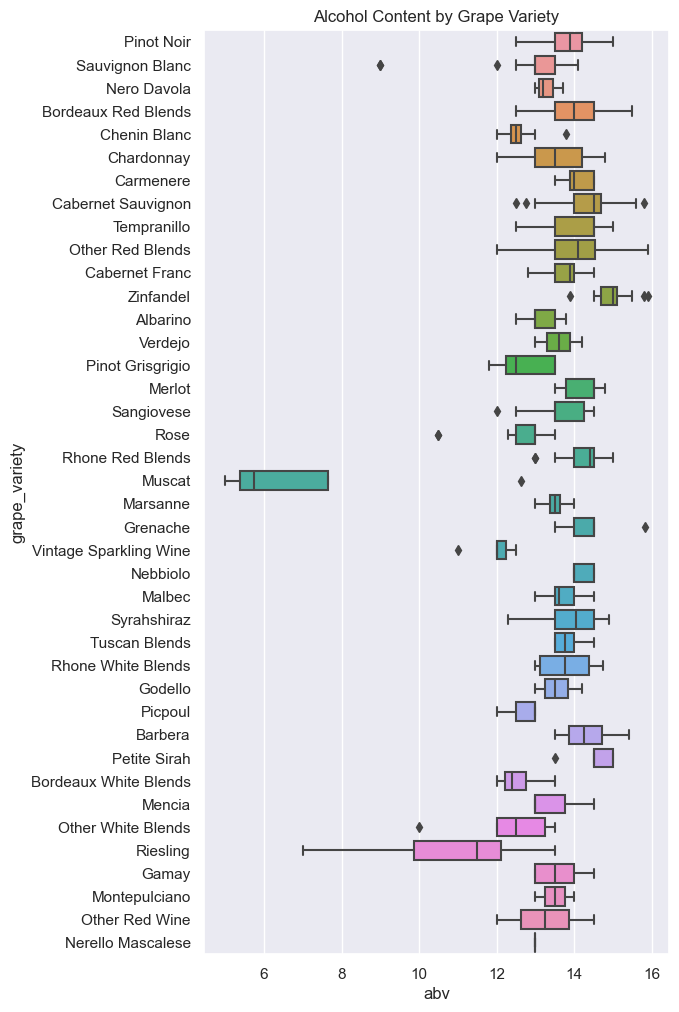

In [9]:
df_a = df[df['abv'].isna() == False]
popular_grape_varieties = df_a[(df_a['grape_variety'].isin((df_a['grape_variety'].value_counts().head(40).index)))]
plt.figure(figsize=(6, 12)) 
sns.boxplot(x='abv', y='grape_variety', data=popular_grape_varieties)
plt.xticks() 
plt.title('Alcohol Content by Grape Variety')
plt.show()


* Fair amount of variation between average abv and abv spread between differing grape varieties. Muscat and Riesling for example are trypically on the lower end of alcohol content.

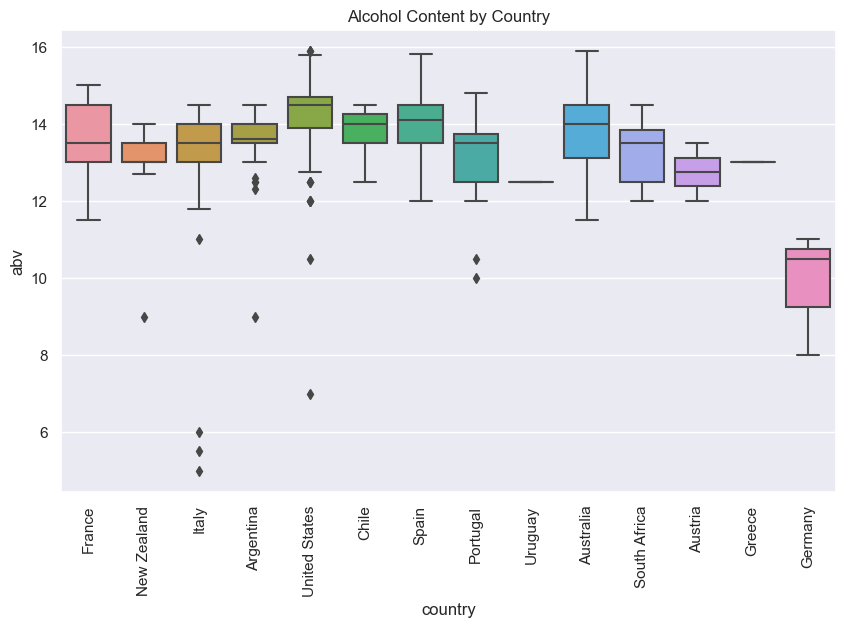

In [10]:
# Box plot for abv 
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='country', y='abv', data=df_a)
plt.xticks(rotation=90) 
plt.title('Alcohol Content by Country')
plt.show()

* Germany, a country known for its Reisling wine is one of the countries with the lowest average alcohol content. 
* Most countries fall between the 15% - 12.5% range 
* Unfortified wines contain anywhere from 5.5% to 16% ABV, with an average in our dataset of 13.6%. 

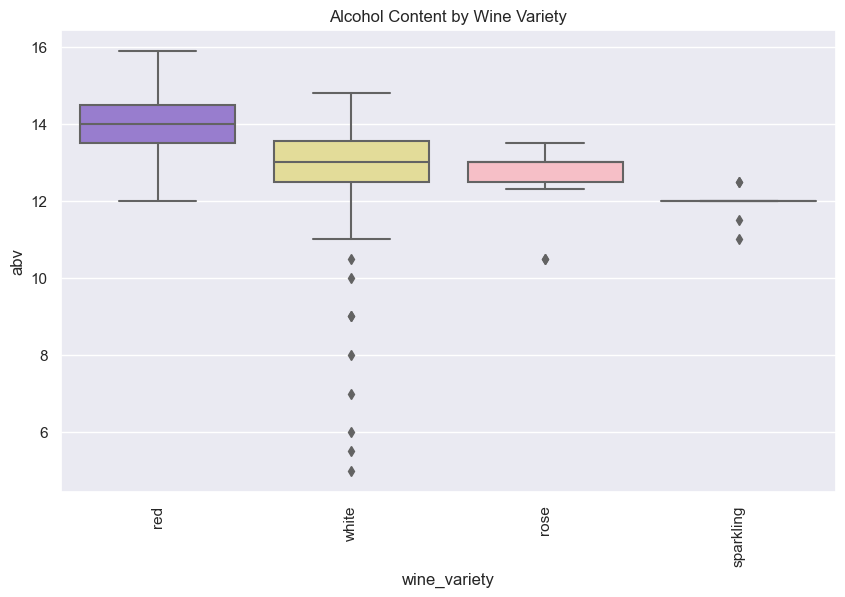

In [11]:
colour_mapping = {
    'red': 'mediumpurple',
    'rose': 'lightpink',
    'white': 'khaki',
    'sparkling': 'lightblue'
}
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='wine_variety', y='abv', data=df_a, palette=colour_mapping)
plt.xticks(rotation=90) 
plt.title('Alcohol Content by Wine Variety')
plt.show()

* Red wines typically have a higher alcohol content than other wine types. 
* Sparkling wines have the lowest. 
* White and rose are in the middle though white has a larger spread than rose overlappying with red and rose wines in abv levels. 

# Correlations

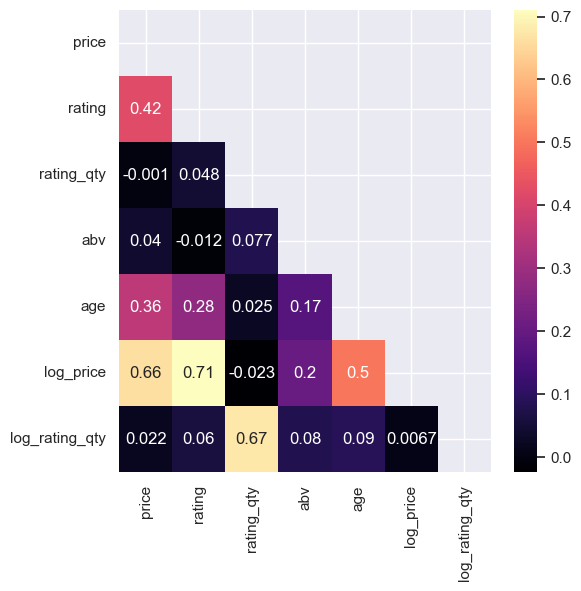

In [12]:
# Correlations on all numeric values - without filtering any data 
numeric = df.drop(columns = [ 'region', 'country', 'vintage', 'producer', 'wine_variety',
       'grape_variety','reviewed_by','from_vivino'])

plt.figure(figsize=(6, 6))

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(numeric.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(numeric.corr(), mask = mask, annot=True, cmap='magma');

* We can see that rating has a high correlation with price when a minimum number of ratings is set. In this case the minimum was 10. 
* Some positive correlation between log_price and alcohol content. 
* Rating and age have a positive correlation, which is to be expected, as wines age they are known to increase in depth of flavour. Furthermore more expensive wines are those created to age better and are often therefore left to age and more likely to be rated more highly once eventually drunk!
* All correlations are stronger with log_price than price suggesting again that our modelling might perform better with log_price as the target. 

In [13]:
# Calculate interquartile range of price and set a limit at 1.5 IQR above 75% percentile for analysis below
Qrt1 = np.quantile(df['price'], 0.25)
Qrt3 = np.quantile(df['price'], 0.75)
price_IQR = Qrt3 - Qrt1
outlier_price_limit = Qrt3 + (price_IQR * 1.5)
outlier_price_limit

60.665000000000006

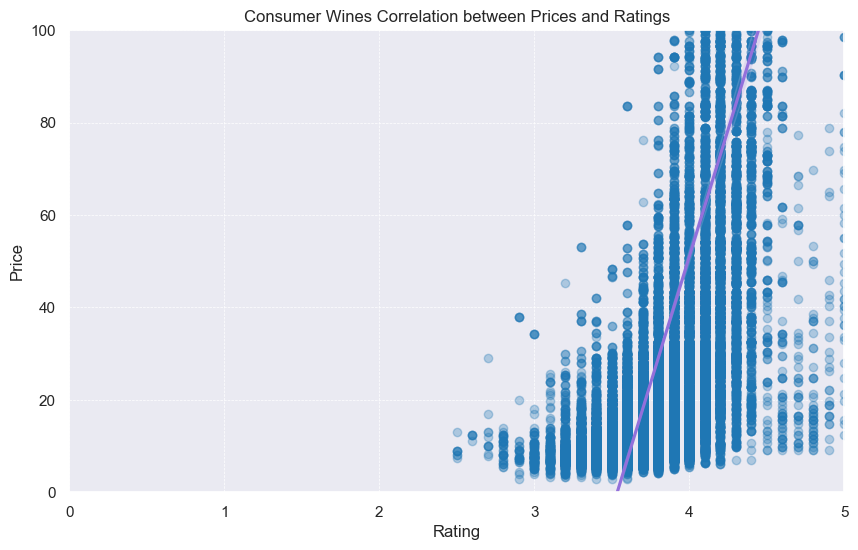

In [16]:
# Focusing only on wines below 78 which is the IQR of price. 
min_rating_qty_consumer_wines = df[df['price'] < outlier_price_limit]
plt.figure(figsize=(10, 6))
sns.regplot(x='rating', y='price', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'mediumpurple'})
plt.title('Consumer Wines Correlation between Prices and Ratings')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.xlim(0, 5)
plt.ylim(0, 100)
plt.grid(True, which="both", ls="--", linewidth=0.5);

Focusing in on wines below £78.15 and wines with a minimum number of ratings: 
* We can see strong positive correlation between rating and price. 
* No wines with less than an average of 2 star rating. 
* bulk of wines rated around 4. 

# Price

Text(0.5, 1.0, 'Log Price by Wine Variety')

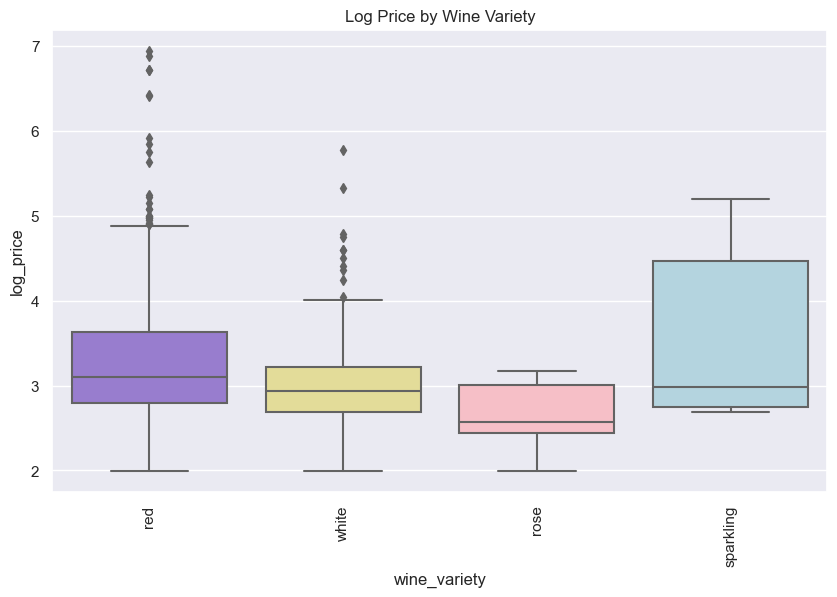

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='wine_variety', y='log_price', data=df_a, palette=colour_mapping)
plt.xticks(rotation=90)
plt.title('Log Price by Wine Variety')

### Producers and Price

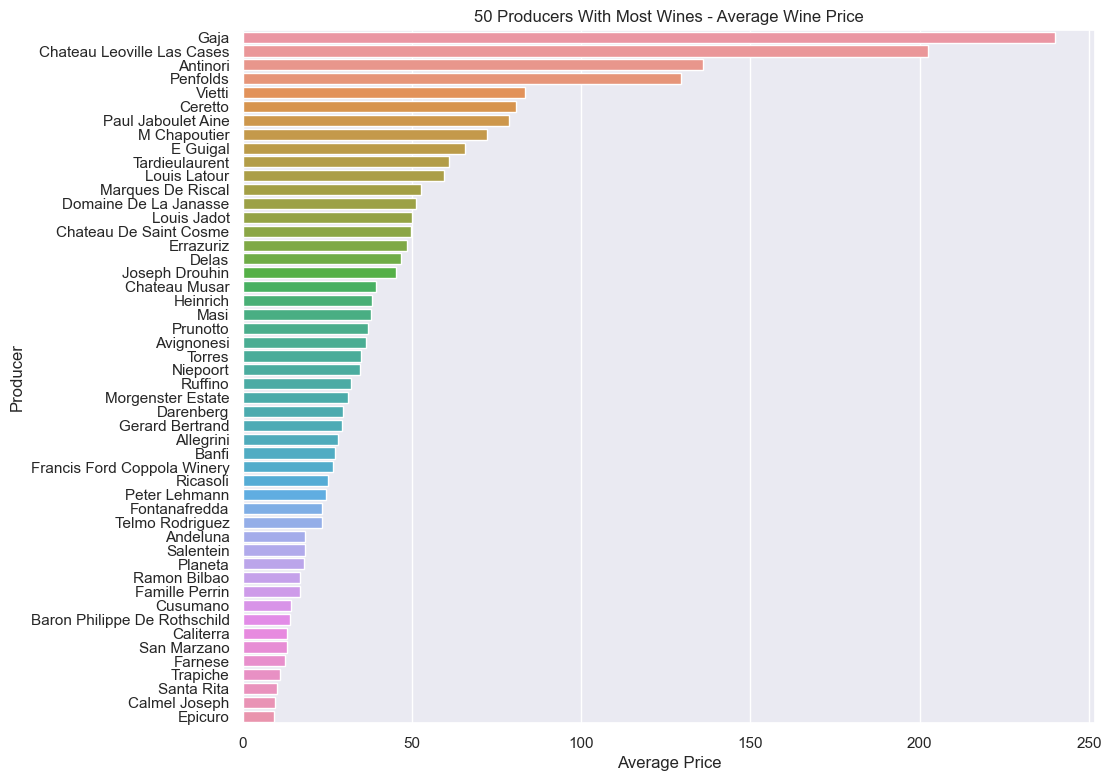

In [18]:
n_producers = 50
top_producers = df['producer'].value_counts().head(n_producers).index
filtered_df = df[df['producer'].isin(top_producers)]
average_prices = filtered_df.groupby('producer')['price'].mean().reset_index()
to_plot = average_prices.sort_values(by='price', ascending=False)

plt.figure(figsize=(11, 9))

sns.barplot(x='price', y='producer', data=to_plot)

plt.xlabel('Average Price')
plt.ylabel('Producer')
plt.title(f'{n_producers} Producers With Most Wines - Average Wine Price');


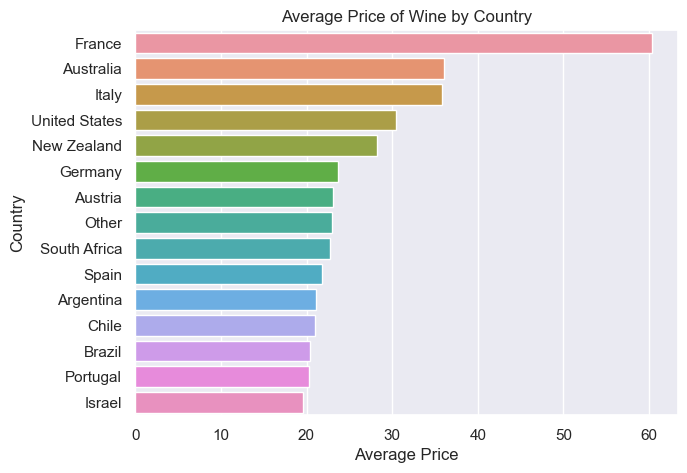

In [19]:
n_countries = 15
countrylist = list(df['country'].value_counts().head(n_countries).index)
top_countries = df[df['country'].isin(countrylist)]
avg_price_by_country = top_countries.groupby('country')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(7, 5))
sns.barplot(x=avg_price_by_country.values, y=avg_price_by_country.index)
plt.xlabel('Average Price')
plt.ylabel('Country')
plt.title('Average Price of Wine by Country');

## Rating

In [20]:
# Average rating by country (using only wines with more than 25 ratings) 
n_countries_r = 20
countrylist = list(df['country'].value_counts().head(n_countries_r).index)
top_countries = high_rating_qty_only[high_rating_qty_only['country'].isin(countrylist)]
avg_rating_by_country = top_countries.groupby('country')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(7, 5))
sns.barplot(x=avg_rating_by_country.values, y=avg_rating_by_country.index)
plt.xlabel('Average Rating')
plt.ylabel('Country')
plt.title('Average Rating of Wine by Country');

NameError: name 'high_rating_qty_only' is not defined

In [21]:
high_rating_qty_only['country'].value_counts()

NameError: name 'high_rating_qty_only' is not defined

* Suprising to see wines from lebanon with such high average ratings. There are 60 wines with more than 25 rating_qty from Lebanon in our dataset compared to 9258 from france and 1779 from US, so perhaps this is a sampling quirk. 


# Categoricals

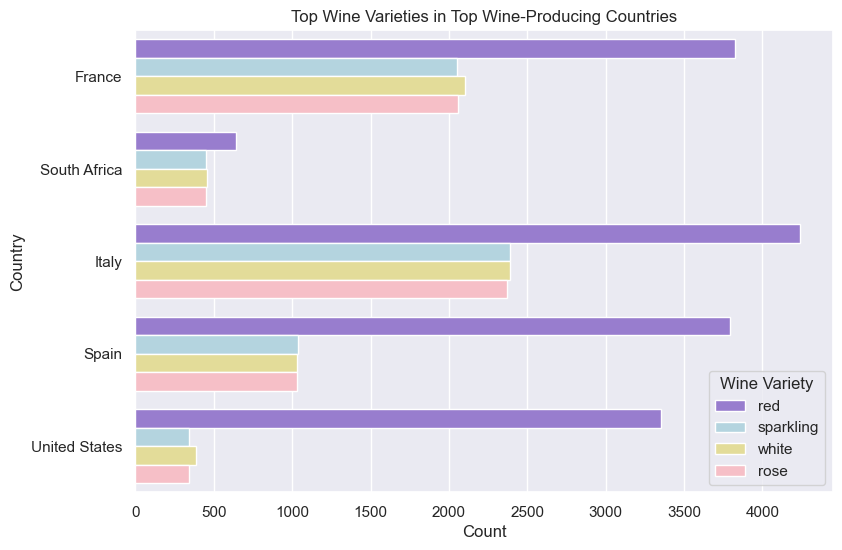

In [ ]:
n_countries = 5

colour_mapping = {
    'red': 'mediumpurple',
    'rose': 'lightpink',
    'white': 'khaki',
    'sparkling': 'lightblue'
}

top_countries = df['country'].value_counts().nlargest(n_countries).index
df_top_countries = df[df['country'].isin(top_countries)]

plt.figure(figsize=(9, 6))

sns.countplot(y='country', hue='wine_variety', data=df_top_countries,
              palette=colour_mapping)

plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Top Wine Varieties in Top Wine-Producing Countries')

plt.legend(title='Wine Variety');

* Of the top 5 most appearing countries in our dataset all countries produce red in highest quantity, white is always second and it's close between rose and sparkling.

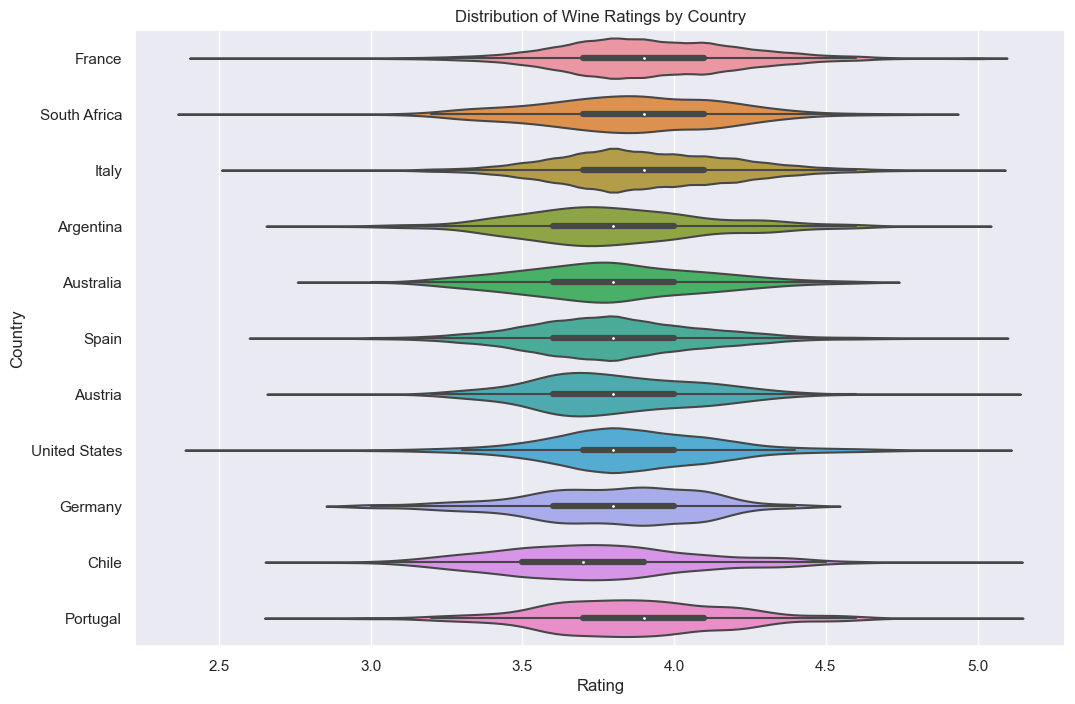

In [ ]:
# Filter to include only countries with a significant number of ratings for meaningful comparison
significant_countries = high_rating_qty_only.groupby('country').filter(lambda x: len(x) > 500)

plt.figure(figsize=(12, 8))
sns.violinplot(x='rating', y='country', data=significant_countries)
plt.xlabel('Rating')
plt.ylabel('Country')
plt.title('Distribution of Wine Ratings by Country');

# EDA Functions For Application

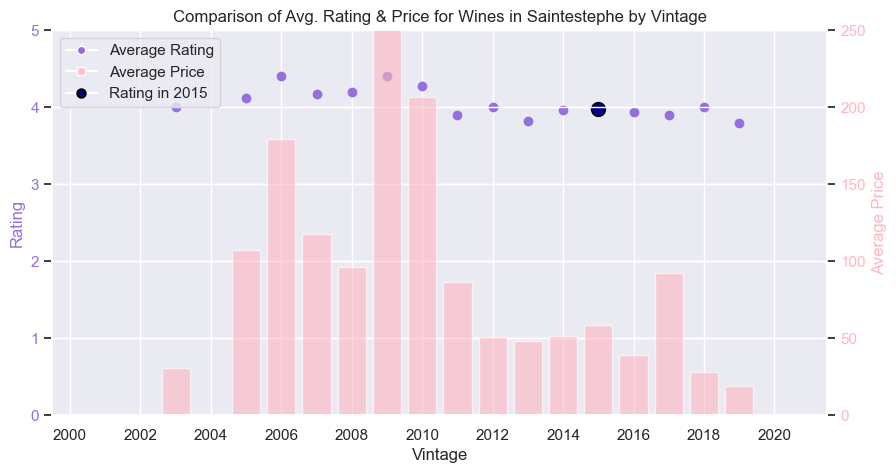

In [ ]:
vis.plot_country_vintage_comparison(df, 'Saintestephe', 2015, plot_region=True)

In [ ]:
result_df = vis.compare_close_vintages_in_a_country(df, 'Spain', 1995)
result_df

,Vintage,Avg Rating,Avg Price
0,1992,4.00,103.39
1,1995,4.30,157.53
2,1996,4.22,143.14
3,1997,4.30,72.47
4,1998,4.50,57.82


## Finding Underpriced Wines 

In [ ]:
# Make a measure for price per star rating 
df['price_per_star'] = df['price'] / df['rating']

# Filter df to only contain wines with 30 or more ratings 
df_rated = df[df['rating_qty'] > 29]

# Make a column which represents the average price per star for each region in a given year (vintage)
avg_price_per_star = df_rated.groupby(['region', 
                                       'vintage']).apply(lambda x: (x['price'].mean() / x['rating'].mean())).reset_index(name='rvint_price_per_star')

# Add this column to df_rated
df_rated= pd.merge(df_rated, avg_price_per_star, on=['region', 'vintage'], how='left')

# Remove columns we wont be using
df_rated.drop(columns=['from_vivino', 'reviewed_by'], inplace=True)
df_rated


,region,country,vintage,producer,wine_variety,grape_variety,price,rating,rating_qty,abv,age,log_price,log_rating_qty,price_per_star,rvint_price_per_star
0,Other,France,2015,Rocca Maura,red,Unknown,5.24,3.4,141,NaN,9,1.656321,4.948760,1.541176,10.067050
1,Western Cape,South Africa,2017,Laborie,sparkling,Cabernet Sauvignon,9.21,3.4,177,NaN,7,2.220290,5.176150,2.708824,3.437978
2,Toscana,Italy,2015,Tua Rita,white,Unknown,26.84,3.8,230,NaN,9,3.289893,5.438079,7.063158,12.102934
3,Toscana,Italy,2015,Tua Rita,white,Syrah,167.34,4.2,65,NaN,9,5.120028,4.174387,39.842857,12.102934
4,Mendoza,Argentina,2016,Catena,red,Cabernet Sauvignon,17.13,3.9,1993,NaN,8,2.840831,7.597396,4.392308,7.133107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41141,Alentejo,Portugal,2010,Azamor,sparkling,Unknown,21.05,3.8,45,NaN,14,3.046901,3.806662,5.539474,5.539474
41142,Cotes Catalanes,France,2017,Domaine Lafage,red,Carignan,16.99,3.8,1107,NaN,7,2.832625,7.009409,4.471053,3.188220
41143,Terre Siciliane,Italy,2018,Barone Montalto,white,Syrah,5.77,3.7,748,NaN,6,1.752672,6.617403,1.559459,2.258859
41144,Brunello Di Montalcino,Italy,2013,Donatella Cinelli Colombini,red,Unknown,43.35,4.5,219,NaN,11,3.769307,5.389072,9.633333,17.752349


In [ ]:
# Make a column for region-vintage combinations
df_rated['region_vintage'] = df_rated['region'] + '-' + df_rated['vintage'].astype(str)

# Remove wines with unknown regions
df_rated = df_rated[df_rated['region'] != 'Unknown'].copy()

# Make a list of region vintage combinations that have 30 or more observations - REDO 
rvint_list = df_rated['region_vintage'].value_counts().head(266).index
df_rated_shortlist = df_rated[df_rated['region_vintage'].isin(rvint_list)].copy()

# Make a column for the difference between the average price per star and the average price per star for each region-vintage
df_rated_shortlist['price_per_star_diff'] = df_rated_shortlist['price_per_star'] - df_rated_shortlist['rvint_price_per_star']

In [ ]:
# Isolate producers wine representations in 4 or more vintages
producers_with_4_or_more_vintages = df_rated_shortlist.groupby('producer')['vintage'].nunique().loc[lambda x: x >= 4].index

final_df = df_rated_shortlist[df_rated_shortlist['producer'].isin(producers_with_4_or_more_vintages)]

In [ ]:
def plot_producer_price_per_star(df, xlim = 2020, ylim = 40):
    for producer in df['producer'].unique():
        producer_df = df[df['producer'] == producer].sort_values('vintage')
        print(producer)
        plt.figure(figsize=(6, 4))
        plt.plot('vintage', 'price_per_star', data=producer_df, label='Price Per Star', 
                 marker='o', color = 'mediumpurple') 
        plt.plot('vintage', 'rvint_price_per_star', data=producer_df, label='RVint Price Per Star', 
                 linestyle='--', marker='x', color = 'lightpink')
        plt.xlabel('Vintage')
        plt.ylabel('Price Per Star Metrics')
        plt.ylim(0, ylim)
        plt.xlim(2010, xlim)
        plt.title(f'Price Per Star Comparison for {producer}')
        plt.legend();

#### France

In [ ]:
france_shortlist = final_df[final_df['country'] == 'France'].copy()
top_20_france = france_shortlist.groupby('producer')['price_per_star_diff'].mean().sort_values(ascending=True).head(80).index
france_shortlist_20 = france_shortlist[france_shortlist['producer'].isin(top_20_france)]

# Filter for regions with region vintage representations of 10 or more 
competitive_france_regions = france_shortlist_20.groupby('region_vintage').filter(lambda x: len(x) >= 10)
france_region_list = ['Margaux','Saintjulien', 'Saintemilion Grand Cru']

In [ ]:
almost_final_france = competitive_france_regions[competitive_france_regions['region'].isin(france_region_list)].copy()

In [ ]:
final_france_producers = almost_final_france.groupby('producer')['price_per_star_diff'].mean().sort_values(ascending=True).head(6).index

In [ ]:
final_france = almost_final_france[almost_final_france['producer'].isin(final_france_producers)]

In [ ]:
margaux = final_france[final_france['region'] == 'Margaux']

Chateau Leoville Poyferre
Chateau Branaireducru
Chateau Lagrange
Chateau La Serre
Clos De Loratoire
Clos Dubreuil


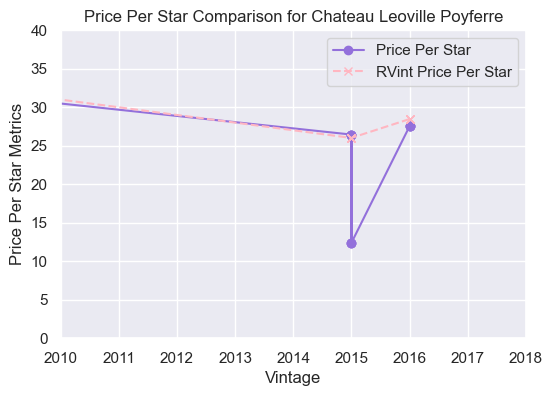

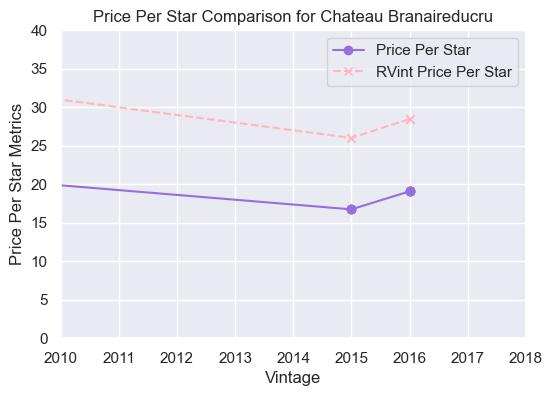

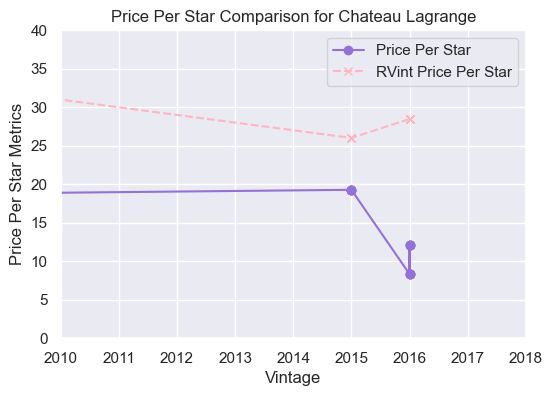

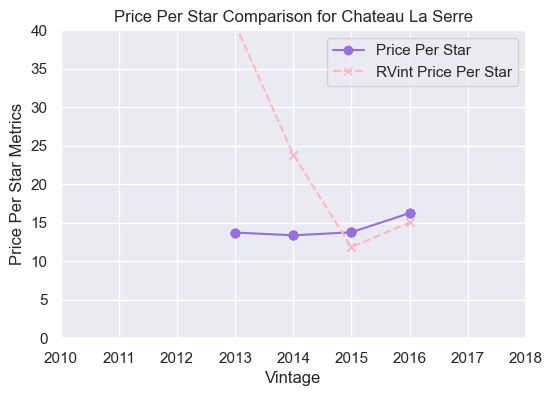

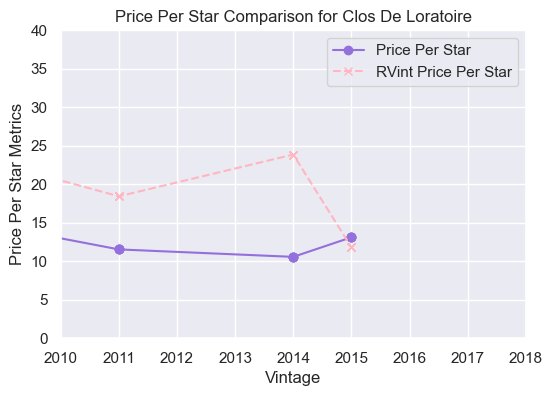

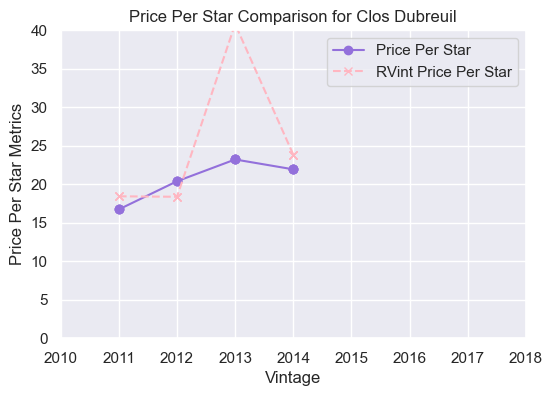

In [ ]:
# This is a list of 
plot_producer_price_per_star(final_france, xlim=2018)

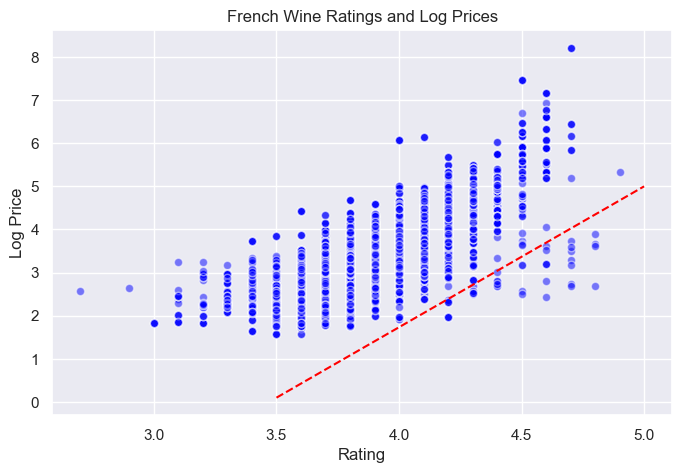

In [ ]:
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib 

df_france_rated_shortlist = df_rated_shortlist[df_rated_shortlist['country'] == 'France'].copy()

plt.figure(figsize=(8, 5))
plt.scatter(df_france_rated_shortlist['rating'], df_france_rated_shortlist['log_price'], 
            alpha=0.5, c='blue', edgecolors='w', label='Wine')

x, y = [3.5, 5], [0.1, 5]
# # Plotting the line
plt.plot(x, y, 'r--', label='bargains')

plt.title('French Wine Ratings and Log Prices')
plt.xlabel('Rating')
plt.ylabel('Log Price');

In [ ]:
x1, y1 = 3.5, 0.1
x2, y2 = 5, 5
m = (y2 - y1) / (x2 - x1)
b = y1 - m * x1

# Step 2: Define a function to determine if a wine is to the right of the line
def is_right_of_line(rating, log_price):
    # Calculate the y value on the line for this x (rating)
    y_line = m * rating + b
    # If the wine's log_price is greater than y_line, it's to the right of the line
    return log_price > y_line

# Apply the function to each row in the DataFrame
df_france_rated_shortlist['bargain'] = df_france_rated_shortlist.apply(
    lambda row: is_right_of_line(row['rating'], row['log_price']), axis=1)


#### Producers 

**Find producers that are consistently beating the price/rating ratio for their given region_vintage.**

Italy

In [ ]:
italy_shortlist = df_rated_shortlist[df_rated_shortlist['country'] == 'Italy'].copy()
top_20_italy = italy_shortlist.groupby('producer')['price_per_star_diff'].mean().sort_values(ascending=True).head(80).index
top_20_italy

Index(['Benvolio', 'Canneto', 'Casanuova Delle Cerbaie', 'Oliviero Toscani',
       'Elio Filippino', 'Tenuta Limpostino', 'Terrabianca', 'Franco Molino',
       'Lano Gianluigi', 'Carlin De Paolo', 'Tassi', 'Tenuta Cucco',
       'Villa Rosa', 'La Gerla', 'Giulia Negri', 'Marco Bonfante',
       'Tenuta Di Ceppaiano', 'Buon Tempo', 'Bera', 'Danzante',
       'Roberto Sarotto', 'Gioso', 'Giacosa Fratelli', 'Piancornello',
       'Famiglia Castellani', 'Santa Marina', 'Boasso', 'Poggio Delle Faine',
       'Fertuna', 'Tenuta Carlina La Togata', 'Costa Di Bussia Tenuta Arnulfo',
       'Teruzzi Puthod', 'Serre Dei Roveri', 'Virna', 'Pira Luigi',
       'Tenuta Podernovo', 'Cascina Luisin', 'Lo Zoccolaio', 'Monte Antico',
       'Poggio Al Casone', 'I Palazzi', 'Tiberio', 'Fattoi', 'Vinea Familiae',
       'Paolo Manzone', 'Vinosia', 'Poggio Alla Sala', 'Villadoria',
       'Pertinace', 'Dogliotti 1870', 'Il Palagione', 'Armando Piazzo',
       'Il Valentiano', 'Rocca Di Montegrossi', 'Zi

In [ ]:
italy_shortlist_20 = italy_shortlist[italy_shortlist['producer'].isin(top_20_italy)]
print(italy_shortlist_20['region'].value_counts())

region
Barolo                    110
Toscana                    99
Brunello Di Montalcino     47
Langhe                     36
Other                      29
Barbera Dasti              27
Barbera Dalba              22
Barbaresco                 20
Chianti Classico           15
Dolcetto Dalba              1
Chianti                     1
Rosso Di Montalcino         1
Name: count, dtype: int64


In [ ]:
# Try with log_price 

df['log_price_per_star'] = df['log_price'] / df['rating']
df_rated = df[df['rating_qty'] > 30]
avg_price_per_star = df_rated.groupby(['region', 
                                       'vintage']).apply(lambda x: (x['log_price'].mean() / x['rating'].mean())).reset_index(name='log_rvint_price_per_star')

df_rated= pd.merge(df_rated, avg_price_per_star, on=['region', 'vintage'], how='left')
df_rated.drop(columns=['from_vivino', 'reviewed_by'], inplace=True)
df_rated['region_vintage'] = df_rated['region'] + '-' + df_rated['vintage'].astype(str)
df_rated = df_rated[df_rated != 'Unknown'].copy()

rvint_list = df_rated['region_vintage'].value_counts().head(266).index
df_rated_shortlist = df_rated[df_rated['region_vintage'].isin(rvint_list)].copy()
df_rated_shortlist['log_price_per_star_diff'] = df_rated_shortlist['log_price_per_star'] - df_rated_shortlist['log_rvint_price_per_star']

In [ ]:
italy_shortlist = df_rated_shortlist[df_rated_shortlist['country'] == 'Italy'].copy()
top_50_italy_log = italy_shortlist.groupby('producer')['log_price_per_star_diff'].mean().sort_values(ascending=True).head(50).index

italy_shortlist_50_log = italy_shortlist[italy_shortlist['producer'].isin(top_50_italy_log)]
print(italy_shortlist_50_log['region'].value_counts())

region
Other                     51
Toscana                   38
Barolo                    32
Langhe                    11
Barbera Dalba              8
Chianti                    7
Terre Siciliane            6
Chianti Classico           6
Brunello Di Montalcino     5
Barbera Dasti              5
Montepulciano Dabruzzo     4
Barbaresco                 1
Name: count, dtype: int64


In [ ]:
def plot_producer_price_per_star(df):
    plt.figure(figsize=(8, 5))
    for producer in df['producer'].unique():
        producer_df = df[df['producer'] == producer].sort_values('vintage')
        plt.figure(figsize=(6, 4))
        plt.plot('vintage', 'price_per_star', data=producer_df, label='Price Per Star', marker='o')
        plt.plot('vintage', 'rvint_price_per_star', data=producer_df, label='Region Vintage Average', linestyle='--', marker='x')
        plt.xlabel('Vintage')
        plt.ylabel('Price Per Star Metrics')
        plt.title(f'Price Per Star Comparison for {producer}')
        plt.legend()

In [ ]:
# italy_shortlist_50_log['price_per_star'] = italy_shortlist_50_log['log_price_per_star'].apply(lambda x: np.exp(x)).copy()
# italy_shortlist_50_log['rvint_price_per_star'] = italy_shortlist_50_log['log_rvint_price_per_star'].apply(lambda x: np.exp(x)).copy()
    
# plot_producer_price_per_star(italy_shortlist_50_log)